In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
glassdoor_df = pd.read_csv("glassdoor_raw_data.csv",encoding='latin8')

In [3]:
glassdoor_df.head()

,Unnamed: 0,CompanyName,JobTitle,JobDescription,Overall_rating,Comp_Benefits,Culture_Values,Career_Opportunities,Work_Life_Balance,Senior_Management
0,0,Invest Bots Limited,Data Scientist,"InvBots.com (Invest Bots Limited), is a fast g...",NaN,NaN,NaN,NaN,NaN,NaN
1,1,IBM,Data Scientist,Introduction\rn/a\r\rYour Role and Responsibil...,3.7,3.2,3.8,3.6,3.9,3.1
2,2,Morningstar,Data Scientist,The Group:\r\rMorningstarÛẂs Research group p...,4.0,3.4,4.3,3.7,4.3,3.6
3,3,China CITIC Bank International Limited,Data Scientist,Key Responsibilities\r\rDevelop algorithms and...,3.9,3.9,3.9,3.8,3.6,3.8
4,4,Radica Systems Limited,Data Scientist,WHAT YOU'LL DO:\rConstruct data science workfl...,3.4,3.2,3.5,3.1,3.0,3.0


In [4]:
#In case there are duplicated rows, drop it
glassdoor_df.drop_duplicates(inplace=True)

In [5]:
glassdoor_df.shape

(368, 10)

In [6]:
#adding educational level
glassdoor_df['Degree'] = glassdoor_df['JobDescription'].str.contains('[dD]egree|[uU]niversity|[bB]achelor',regex=True)
glassdoor_df['Master'] = glassdoor_df['JobDescription'].str.contains('[mM]aster|MS',regex=True)
glassdoor_df['PhD'] = glassdoor_df['JobDescription'].str.contains('[pP][hH][dD]',regex=True)

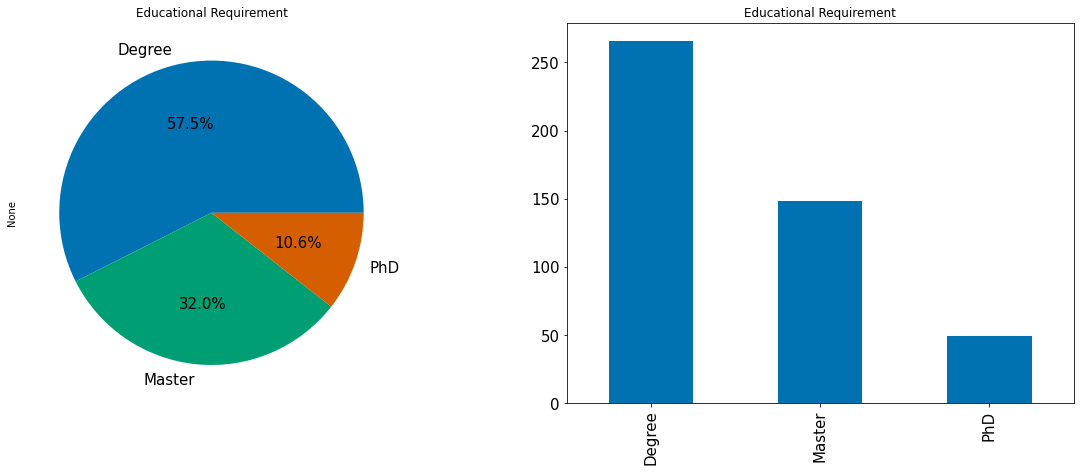

<Figure size 360x360 with 0 Axes>

In [7]:
#Reqiurement for education level
fig, ax = plt.subplots(1,2,figsize=(20,7))
plt.style.use('seaborn-colorblind')
fig = plt.figure(figsize=(5,5))

glassdoor_df.loc[:,'Degree':'PhD'].sum().plot.pie(ax=ax[0],autopct="%1.1f%%",fontsize=15,title='Educational Requirement')
glassdoor_df.loc[:,'Degree':'PhD'].sum().plot.bar(ax=ax[1],fontsize=15,title='Educational Requirement')
plt.show()

In [8]:
potential_skill_set =['Python','R','SQL','Hadoop','Java','SAS','Spark','Hive','Matlab','C','C#','C++','Tableau','Scala','Excel','Pig','NoSQL','MapReduce','SPSS','Perl','Ruby','HBase','AWS','Cassandra','JavaScript','D3','Mahout','Stata','MongoDB','Julia','Php','D3.js','Shark','Azure','Octave','Spotfire','Flume','Mathematica','Oozie','Zookeeper','Tensorflow','SPSS','Qlikview','Flask']

In [9]:
potential_skill_set_upper = [i.upper() for i in potential_skill_set]

In [10]:
#cleanup the data in JobDescription
glassdoor_df['JobDescription'] = glassdoor_df['JobDescription'].apply(lambda x: str(x).replace('\r','').replace(',','').replace('/',' '))

In [11]:
#update the skill sets mentioned in the company
glassdoor_df['SkillList'] = glassdoor_df['JobDescription'].apply(lambda x: [j.upper() for j in x.split() if j.upper() in potential_skill_set_upper] )

In [12]:
glassdoor_df.head()

,Unnamed: 0,CompanyName,JobTitle,JobDescription,Overall_rating,Comp_Benefits,Culture_Values,Career_Opportunities,Work_Life_Balance,Senior_Management,Degree,Master,PhD,SkillList
0,0,Invest Bots Limited,Data Scientist,InvBots.com (Invest Bots Limited) is a fast gr...,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,"[PYTHON, C#, SQL, PHP]"
1,1,IBM,Data Scientist,Introductionn aYour Role and Responsibilitiesp...,3.7,3.2,3.8,3.6,3.9,3.1,False,False,False,"[JAVA, PYTHON, C, R]"
2,2,Morningstar,Data Scientist,The Group:MorningstarÛẂs Research group provi...,4.0,3.4,4.3,3.7,4.3,3.6,True,True,False,"[PYTHON, TENSORFLOW, SQL, AWS, TABLEAU]"
3,3,China CITIC Bank International Limited,Data Scientist,Key ResponsibilitiesDevelop algorithms and sta...,3.9,3.9,3.9,3.8,3.6,3.8,True,True,False,"[PYTHON, PYTHON, R, HIVE, SAS, SAS]"
4,4,Radica Systems Limited,Data Scientist,WHAT YOU'LL DO:Construct data science workflow...,3.4,3.2,3.5,3.1,3.0,3.0,True,False,False,"[R, PYTHON, HADOOP, SQL, HIVE]"


In [13]:
#create a skill_df and merge with original dataframe
from collections import Counter
skill_df = pd.DataFrame(columns = potential_skill_set_upper)
for item in glassdoor_df['SkillList']:
    c = Counter(item)
    skill_df = skill_df.append(dict(c),ignore_index=True)

In [14]:
skill_df.head()

,PYTHON,R,SQL,HADOOP,JAVA,SAS,SPARK,HIVE,MATLAB,C,...,OCTAVE,SPOTFIRE,FLUME,MATHEMATICA,OOZIE,ZOOKEEPER,TENSORFLOW,SPSS,QLIKVIEW,FLASK
0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,2.0,1.0,NaN,NaN,NaN,2.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#append a list of new columns with the potential skill set
glassdoor_df = pd.concat([glassdoor_df, skill_df], axis=1, ignore_index=False)

In [16]:
pd.set_option("display.max_columns",85)
pd.set_option("display.max_row",85)

In [17]:
#dataframe with education background,skill list and individual skills updated
glassdoor_df.head()

,Unnamed: 0,CompanyName,JobTitle,JobDescription,Overall_rating,Comp_Benefits,Culture_Values,Career_Opportunities,Work_Life_Balance,Senior_Management,Degree,Master,PhD,SkillList,PYTHON,R,SQL,HADOOP,JAVA,SAS,SPARK,HIVE,MATLAB,C,C#,C++,TABLEAU,SCALA,EXCEL,PIG,NOSQL,MAPREDUCE,SPSS,PERL,RUBY,HBASE,AWS,CASSANDRA,JAVASCRIPT,D3,MAHOUT,STATA,MONGODB,JULIA,PHP,D3.JS,SHARK,AZURE,OCTAVE,SPOTFIRE,FLUME,MATHEMATICA,OOZIE,ZOOKEEPER,TENSORFLOW,SPSS,QLIKVIEW,FLASK
0,0,Invest Bots Limited,Data Scientist,InvBots.com (Invest Bots Limited) is a fast gr...,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,"[PYTHON, C#, SQL, PHP]",1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,IBM,Data Scientist,Introductionn aYour Role and Responsibilitiesp...,3.7,3.2,3.8,3.6,3.9,3.1,False,False,False,"[JAVA, PYTHON, C, R]",1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Morningstar,Data Scientist,The Group:MorningstarÛẂs Research group provi...,4.0,3.4,4.3,3.7,4.3,3.6,True,True,False,"[PYTHON, TENSORFLOW, SQL, AWS, TABLEAU]",1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,3,China CITIC Bank International Limited,Data Scientist,Key ResponsibilitiesDevelop algorithms and sta...,3.9,3.9,3.9,3.8,3.6,3.8,True,True,False,"[PYTHON, PYTHON, R, HIVE, SAS, SAS]",2.0,1.0,NaN,NaN,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Radica Systems Limited,Data Scientist,WHAT YOU'LL DO:Construct data science workflow...,3.4,3.2,3.5,3.1,3.0,3.0,True,False,False,"[R, PYTHON, HADOOP, SQL, HIVE]",1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


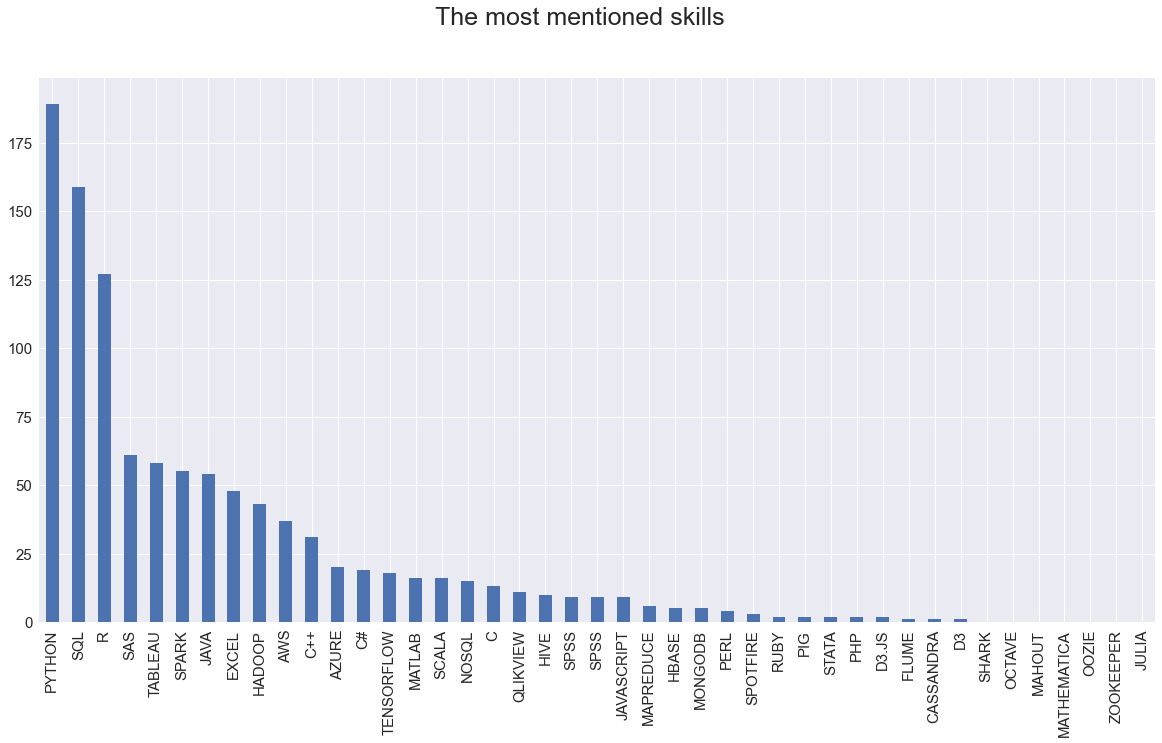

In [18]:
#Most mentioned skills in job description
plt.style.use('seaborn')
fig = plt.figure(figsize=(20,10))
fig.suptitle('The most mentioned skills', fontsize=25)
glassdoor_df.loc[:,'PYTHON':'QLIKVIEW'].sum().sort_values(ascending=False).plot.bar(fontsize=15)
plt.show()

In [28]:
top_ten_rating_company = glassdoor_df.groupby('CompanyName').mean().sort_values('Overall_rating',ascending=False).head(10)

In [26]:
top_ten_rating_company

,Unnamed: 0,Overall_rating,Comp_Benefits,Culture_Values,Career_Opportunities,Work_Life_Balance,Senior_Management,PYTHON,R,SQL,HADOOP,JAVA,SAS,SPARK,HIVE,MATLAB,C,C#,C++,TABLEAU,SCALA,EXCEL,PIG,NOSQL,MAPREDUCE,SPSS,PERL,RUBY,HBASE,AWS,CASSANDRA,JAVASCRIPT,D3,MAHOUT,STATA,MONGODB,JULIA,PHP,D3.JS,SHARK,AZURE,OCTAVE,SPOTFIRE,FLUME,MATHEMATICA,OOZIE,ZOOKEEPER,TENSORFLOW,SPSS,QLIKVIEW,FLASK
CompanyName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Jardine Restaurant Group,342.0,5.0,4.6,4.7,4.6,4.7,4.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ma Belle Jewellery Co Ltd,145.0,5.0,3.0,5.0,3.0,4.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantifeed,248.0,5.0,2.0,5.0,5.0,5.0,5.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Osmium Consulting Group Limited,231.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
You Technologies Group Limited,86.0,5.0,3.0,4.0,5.0,4.0,4.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Talent Blue,233.0,5.0,5.0,5.0,4.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KONUX,191.0,4.8,4.5,4.7,4.5,4.2,4.7,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Foris Limited,83.0,4.8,4.6,4.6,4.5,4.1,4.5,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FNA,15.0,4.8,4.3,4.8,4.5,4.8,4.7,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


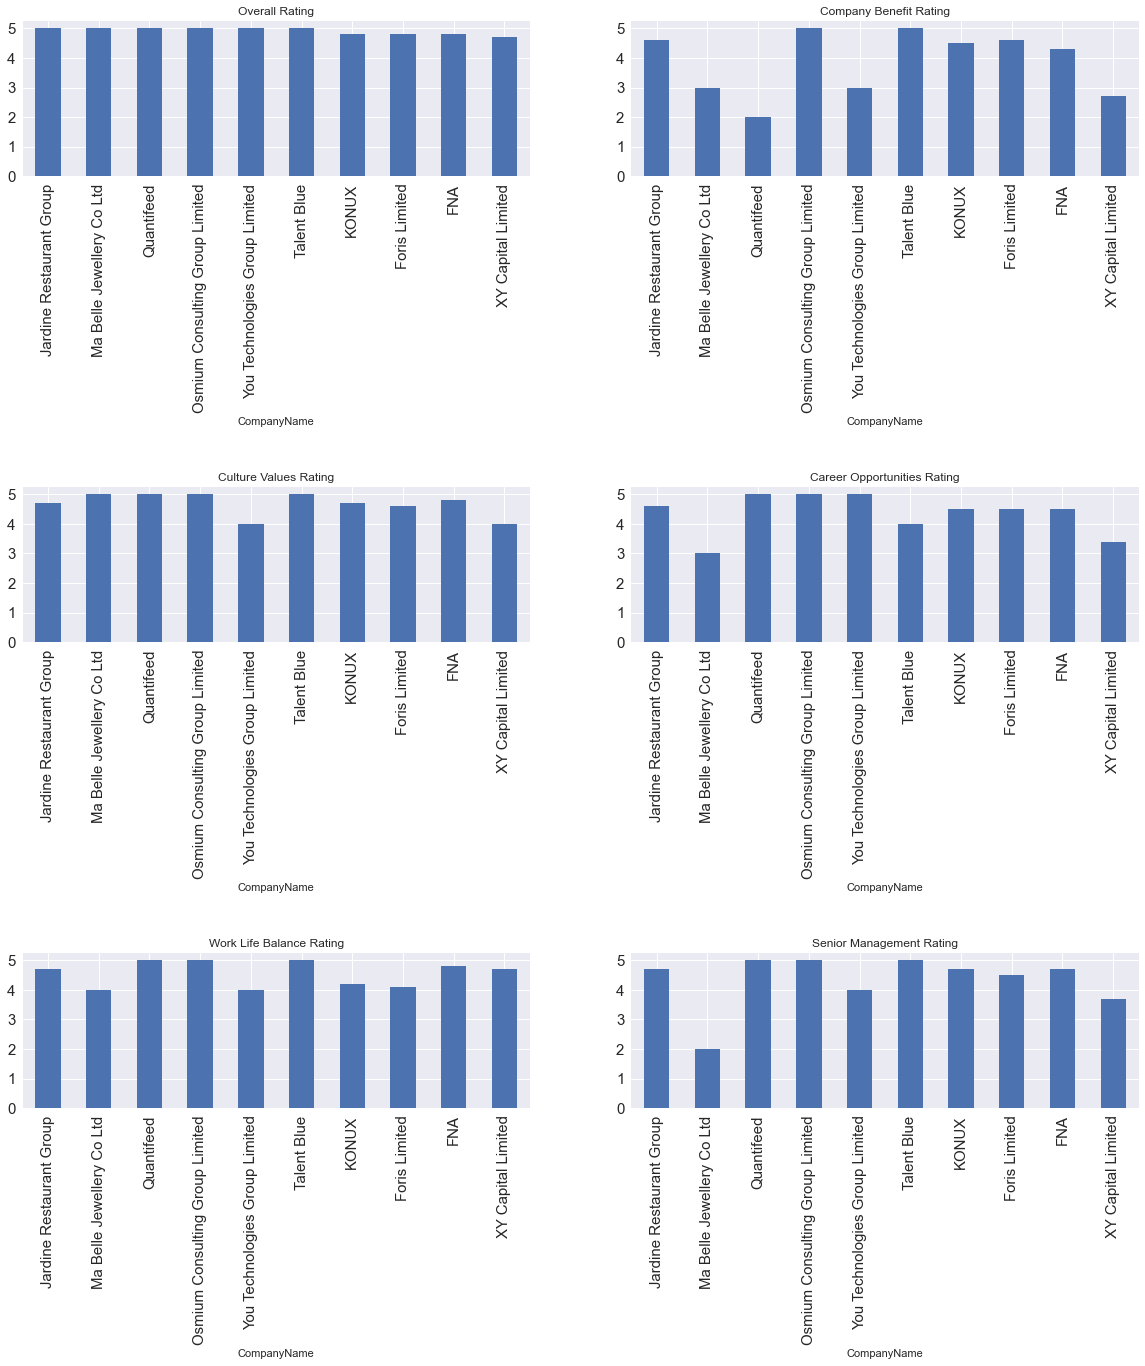

In [29]:
#The rating of top ten companies
fig, ax = plt.subplots(3,2,figsize=(20,20))

plt.subplots_adjust(hspace =2)
top_ten_rating_company.Overall_rating.plot.bar(ax=ax[0][0],title='Overall Rating',fontsize=15)
top_ten_rating_company.Comp_Benefits.plot.bar(ax=ax[0][1],title='Company Benefit Rating',fontsize=15)
top_ten_rating_company.Culture_Values.plot.bar(ax=ax[1][0],title='Culture Values Rating',fontsize=15)
top_ten_rating_company.Career_Opportunities.plot.bar(ax=ax[1][1],title='Career Opportunities Rating',fontsize=15)
top_ten_rating_company.Work_Life_Balance.plot.bar(ax=ax[2][0],title='Work Life Balance Rating',fontsize=15)
top_ten_rating_company.Senior_Management.plot.bar(ax=ax[2][1],title='Senior Management Rating',fontsize=15)

In [30]:
top_ten_rating_company_skill = top_ten_rating_company.loc[:,'PYTHON':'QLIKVIEW'].dropna(axis=1,how='all')
top_ten_rating_company_skill = top_ten_rating_company_skill.applymap(lambda x: 'Y' if x == 1.0 else '-')
top_ten_rating_company_skill

,PYTHON,R,SQL,JAVA,SAS,MATLAB,C,C++,EXCEL,NOSQL,RUBY,TENSORFLOW
CompanyName,,,,,,,,,,,,
Jardine Restaurant Group,-,-,-,-,-,-,-,-,Y,-,-,-
Ma Belle Jewellery Co Ltd,-,-,Y,-,-,-,-,-,-,-,-,-
Quantifeed,-,Y,-,-,-,-,-,-,-,-,-,-
Osmium Consulting Group Limited,Y,Y,-,-,Y,Y,-,Y,-,-,-,-
You Technologies Group Limited,Y,Y,Y,-,Y,-,-,-,-,Y,-,-
Talent Blue,-,-,-,-,-,-,-,-,-,-,-,-
KONUX,Y,-,-,-,-,-,Y,-,-,-,-,Y
Foris Limited,Y,-,-,Y,-,-,-,-,-,-,Y,-
FNA,Y,Y,Y,-,-,Y,-,-,-,-,-,-


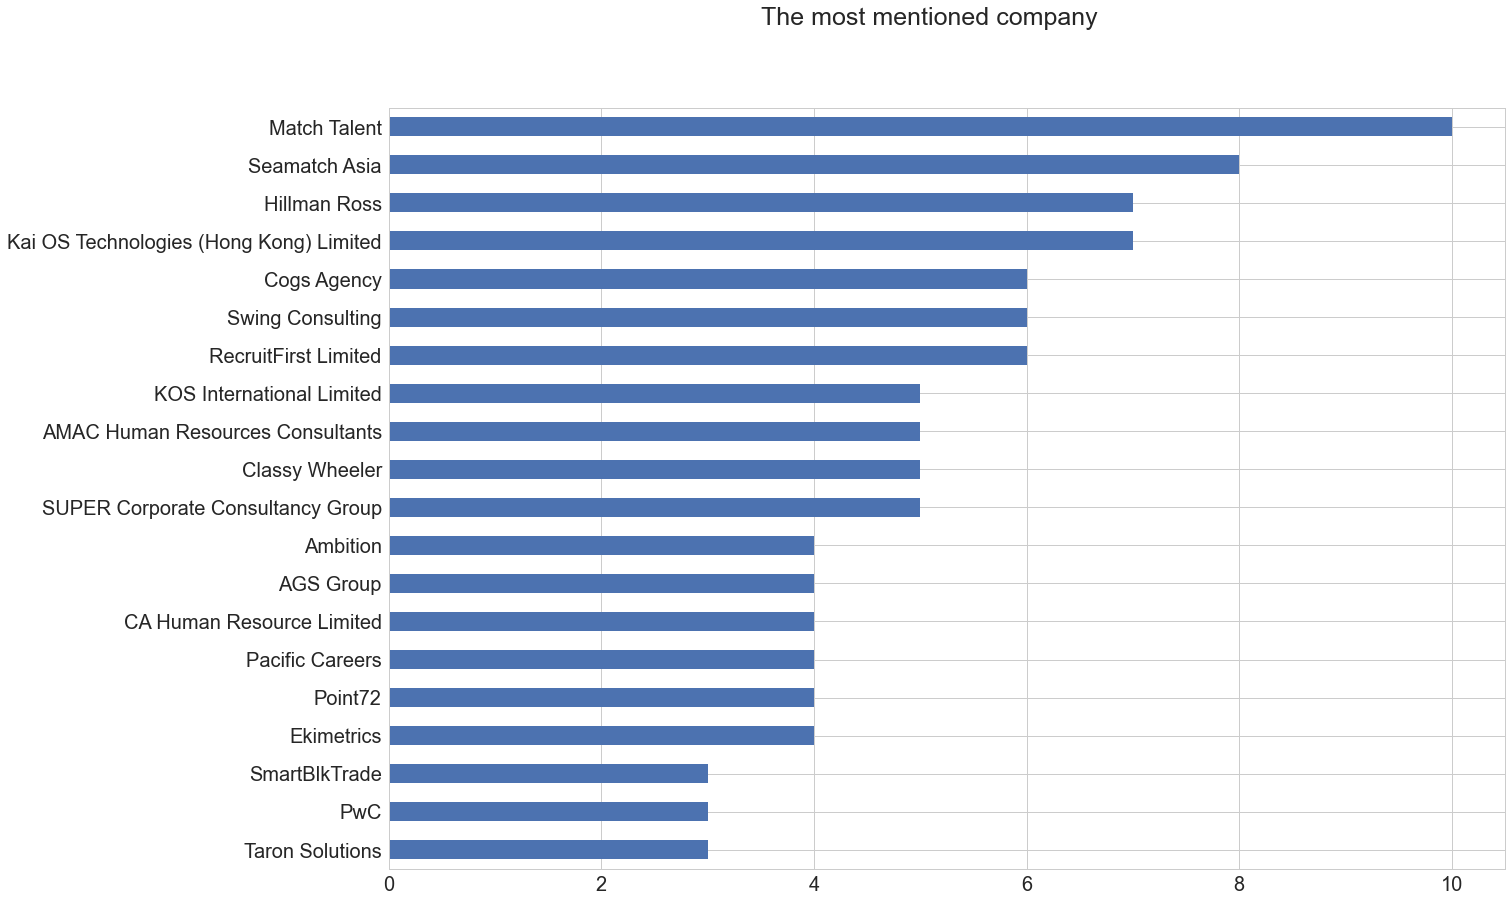

In [31]:
#The companies that appear the most
plt.style.use('seaborn-whitegrid')
fig= plt.figure(figsize=(20,14))
fig.suptitle('The most mentioned company', fontsize=25,)
glassdoor_df['CompanyName'].value_counts()[0:20].sort_values().plot(kind='barh',fontsize=20)

In [32]:
#create the list of title appeared (data scientist,data analyst,data engineer)
ds = list(glassdoor_df[glassdoor_df['JobTitle'].str.match('.*\s[sS]cien[ct].*')==True]['JobTitle'])
da = list(glassdoor_df[glassdoor_df['JobTitle'].str.match('.*\s[aA]naly[st].*')==True]['JobTitle'])
de = list(glassdoor_df[glassdoor_df['JobTitle'].str.match('.*\s[eE]ngineer.*')==True]['JobTitle'])

In [33]:
def new_func(s):
    if s.JobTitle in ds:
        return "Data Scientist"
    elif s.JobTitle in da:
        return 'Data Analyst'
    elif s.JobTitle in de:
        return 'Data Engineer'
    else:
        return "Others"

In [34]:
#added a simplified version of job title
glassdoor_df.insert(2, 'Title', glassdoor_df.apply(new_func, axis = 1))

In [35]:
glassdoor_df.head()

,Unnamed: 0,CompanyName,Title,JobTitle,JobDescription,Overall_rating,Comp_Benefits,Culture_Values,Career_Opportunities,Work_Life_Balance,Senior_Management,Degree,Master,PhD,SkillList,PYTHON,R,SQL,HADOOP,JAVA,SAS,SPARK,HIVE,MATLAB,C,C#,C++,TABLEAU,SCALA,EXCEL,PIG,NOSQL,MAPREDUCE,SPSS,PERL,RUBY,HBASE,AWS,CASSANDRA,JAVASCRIPT,D3,MAHOUT,STATA,MONGODB,JULIA,PHP,D3.JS,SHARK,AZURE,OCTAVE,SPOTFIRE,FLUME,MATHEMATICA,OOZIE,ZOOKEEPER,TENSORFLOW,SPSS,QLIKVIEW,FLASK
0,0,Invest Bots Limited,Data Scientist,Data Scientist,InvBots.com (Invest Bots Limited) is a fast gr...,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,"[PYTHON, C#, SQL, PHP]",1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,IBM,Data Scientist,Data Scientist,Introductionn aYour Role and Responsibilitiesp...,3.7,3.2,3.8,3.6,3.9,3.1,False,False,False,"[JAVA, PYTHON, C, R]",1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Morningstar,Data Scientist,Data Scientist,The Group:MorningstarÛẂs Research group provi...,4.0,3.4,4.3,3.7,4.3,3.6,True,True,False,"[PYTHON, TENSORFLOW, SQL, AWS, TABLEAU]",1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,3,China CITIC Bank International Limited,Data Scientist,Data Scientist,Key ResponsibilitiesDevelop algorithms and sta...,3.9,3.9,3.9,3.8,3.6,3.8,True,True,False,"[PYTHON, PYTHON, R, HIVE, SAS, SAS]",2.0,1.0,NaN,NaN,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Radica Systems Limited,Data Scientist,Data Scientist,WHAT YOU'LL DO:Construct data science workflow...,3.4,3.2,3.5,3.1,3.0,3.0,True,False,False,"[R, PYTHON, HADOOP, SQL, HIVE]",1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
skills_by_title = glassdoor_df.groupby('Title').sum()

In [37]:
skills_by_title

,Unnamed: 0,Overall_rating,Comp_Benefits,Culture_Values,Career_Opportunities,Work_Life_Balance,Senior_Management,PYTHON,R,SQL,HADOOP,JAVA,SAS,SPARK,HIVE,MATLAB,C,C#,C++,TABLEAU,SCALA,EXCEL,PIG,NOSQL,MAPREDUCE,SPSS,PERL,RUBY,HBASE,AWS,CASSANDRA,JAVASCRIPT,D3,MAHOUT,STATA,MONGODB,JULIA,PHP,D3.JS,SHARK,AZURE,OCTAVE,SPOTFIRE,FLUME,MATHEMATICA,OOZIE,ZOOKEEPER,TENSORFLOW,SPSS,QLIKVIEW,FLASK
Title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Data Analyst,38265,330.9,302.5,314.9,307.7,316.2,293.8,57.0,46.0,87.0,10.0,8.0,37.0,7.0,3.0,1.0,4.0,6.0,7.0,42.0,3.0,38.0,0.0,1.0,0.0,5.0,1.0,0.0,1.0,7.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,8.0,0.0
Data Engineer,10810,86.6,80.0,87.0,83.3,84.9,80.1,25.0,7.0,28.0,11.0,12.0,4.0,16.0,3.0,0.0,0.0,3.0,1.0,6.0,5.0,2.0,1.0,2.0,4.0,0.0,0.0,1.0,2.0,16.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,5.0,0.0,3.0,1.0,0.0,0.0,0.0,5.0,0.0,2.0,0.0
Data Scientist,10328,246.8,222.9,243.5,226.3,241.5,228.3,87.0,61.0,37.0,21.0,24.0,12.0,31.0,4.0,8.0,5.0,5.0,11.0,10.0,7.0,7.0,1.0,7.0,1.0,4.0,0.0,1.0,1.0,14.0,1.0,4.0,1.0,0.0,2.0,2.0,0.0,1.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,4.0,1.0,0.0
Others,8125,108.9,107.5,103.7,103.0,100.8,98.0,20.0,13.0,7.0,1.0,10.0,8.0,1.0,0.0,7.0,4.0,5.0,12.0,0.0,1.0,1.0,0.0,5.0,1.0,0.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


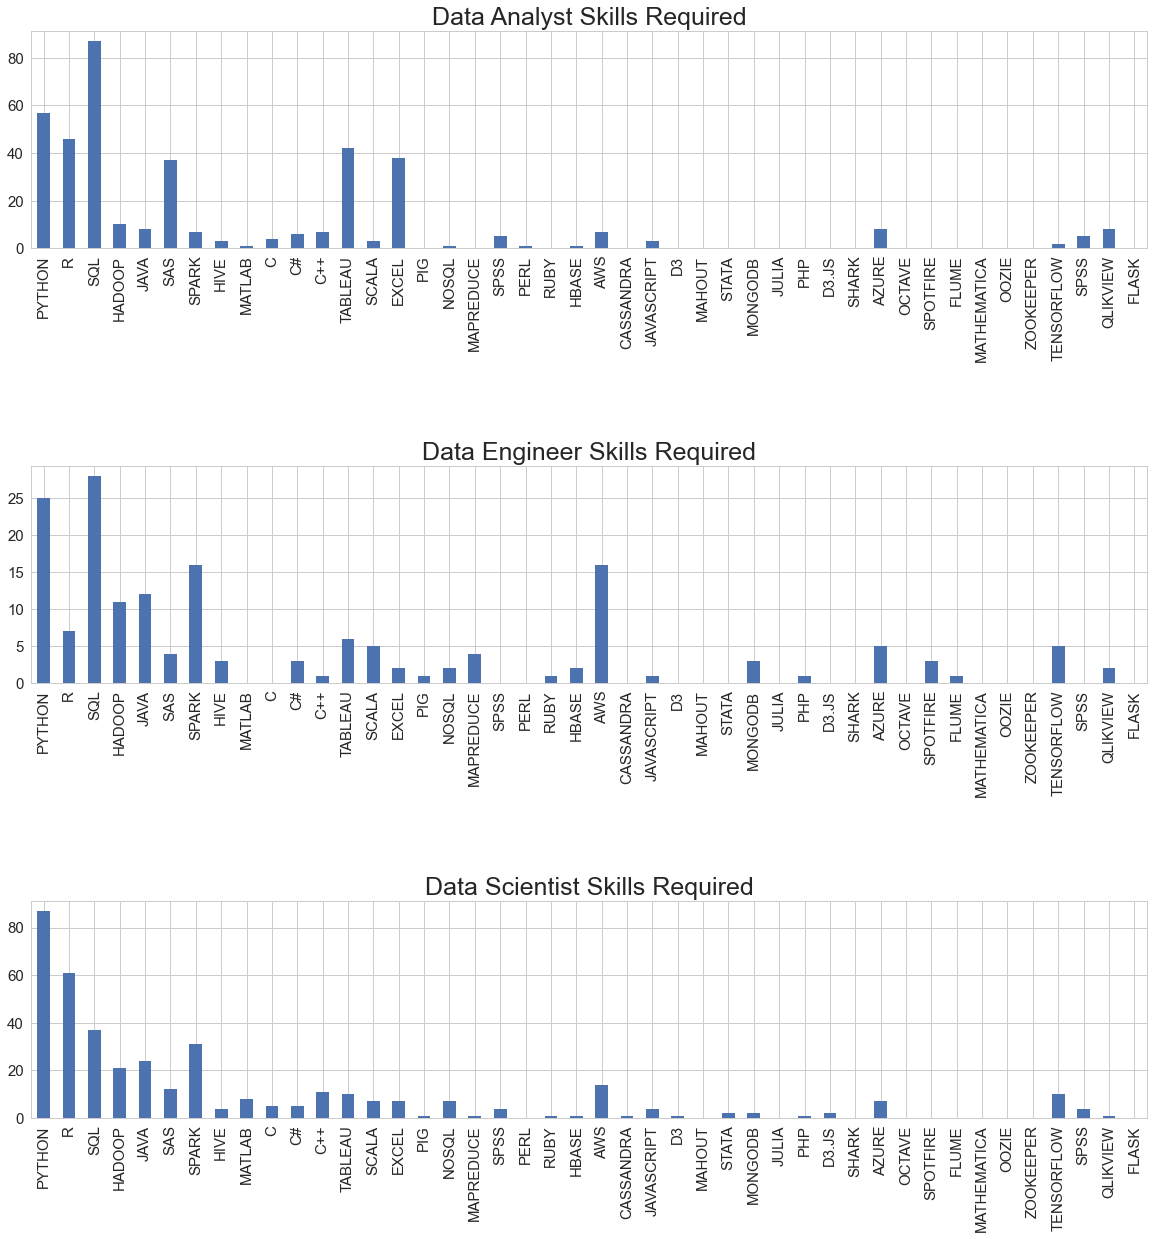

In [38]:
fig, ax = plt.subplots(3,1,figsize=(20,20))

plt.subplots_adjust(hspace =1)
a = skills_by_title.loc['Data Analyst',"PYTHON":"FLASK"].plot.bar(title='Data Analyst Skills Required',ax=ax[0],fontsize=15)
b = skills_by_title.loc['Data Engineer',"PYTHON":"FLASK"].plot.bar(title='Data Engineer Skills Required',ax=ax[1],fontsize=15)
c = skills_by_title.loc['Data Scientist',"PYTHON":"FLASK"].plot.bar(title='Data Scientist Skills Required',ax=ax[2],fontsize=15)

a.set_title('Data Analyst Skills Required',fontsize=25)
b.set_title('Data Engineer Skills Required',fontsize=25)
c.set_title('Data Scientist Skills Required',fontsize=25)

plt.show()

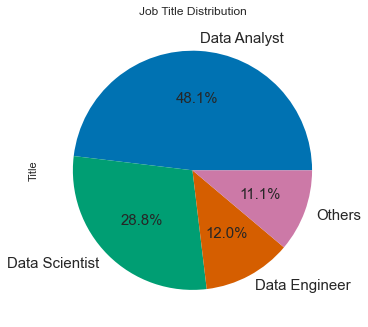

In [40]:
plt.style.use('seaborn-colorblind')
glassdoor_df['Title'].value_counts().plot.pie(title="Job Title Distribution",autopct='%1.1f%%',fontsize=15)

#### 